In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-chasegame-show-israel-episode-data/The_Chase__Dataset.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
c_data = pd.read_csv('/kaggle/input/the-chasegame-show-israel-episode-data/The_Chase__Dataset.csv')

# Introduction
let's first discuss our goals and define our hypotheses.

### The goals:
1) Predicting the game outcome depending on the data we start with before playing the game , meaning age and genders of all 4 contestants.

2) Predicting the amount of question the team will awnser in the final round

### Hypotheses and question to awnser:
1) What gender is more/less likley to take a risk (taking the offer for a larger sum)

2) What age has the heighest winning rate ?

3) What gender has the heighest winning rate ?

4) Is there a connection between the the the amount of money gathered to to chances of winning the game ?

### Feature Engineering goals:
1) Create a feature that tells us was a risk taken or if the easier path was choosen in the offering stage.

2) Create a feature that represent the amount of players that got to the final round.



Now that we have defind all our goals for this kernel we can dive into the data.

# Feature Engineering

In [4]:
#creating a featues which shows us the amount of player that got to the final round
def count_players(sir):
    return sir['p1_round_status']+sir['p_2_round_status']+sir['p_3_round_status']+sir['p_4_round_status']

c_data['contestants_at_finals'] = c_data.apply(count_players,axis=1)

#creating a featues which shows us did a contestant choose a 'risk' or and 'easypath'

choice_dict = {3:'Risk',2:'Same Sum',1:'Safety'}

def choice_type(r_sum,p_sum):
    if r_sum < p_sum:
        return 3
    elif r_sum == p_sum:
        return 2
    else:
        return 1

results = []
for index,row in c_data.iterrows():
    results.append(choice_type(c_data.loc[index,'p_1_fast_round_sum'],c_data.loc[index,'p_1_play_sum_chosen']))
c_data['p_1_choice'] = results

results = []
for index,row in c_data.iterrows():
    results.append(choice_type(c_data.loc[index,'p_2_fast_round_sum'],c_data.loc[index,'p_2_play_sum_chosen']))
c_data['p_2_choice'] = results

results = []
for index,row in c_data.iterrows():
    results.append(choice_type(c_data.loc[index,'p_3_fast_round_sum'],c_data.loc[index,'p_3_play_sum_chosen']))
c_data['p_3_choice'] = results


results = []
for index,row in c_data.iterrows():
    results.append(choice_type(c_data.loc[index,'p_4_fast_round_sum'],c_data.loc[index,'p_4_play_sum_chosen']))
c_data['p_4_choice'] = results
c_data.head(3)

,p_1_gender,p_1_age,p_1_fast_round_sum,p_1_play_sum_chosen,p1_round_status,p_2_gender,p_2_age,p_2_fast_round_sum,p_2_play_sum_chosen,p_2_round_status,...,p_4_round_status,team_total_sum,question_answered,game_result,season,contestants_at_finals,p_1_choice,p_2_choice,p_3_choice,p_4_choice
0,male,30,20000,20000,1,female,27,50000,50000,1,...,0,105000,19,0,1,3,2,2,2,2
1,male,45,35000,35000,1,female,67,30000,30000,0,...,1,215000,23,0,1,3,2,2,2,3
2,female,33,25000,25000,1,male,57,20000,20000,1,...,0,60000,23,0,1,3,2,2,2,3


In [5]:
#useful lists 
player_genders = ['p_1_gender','p_2_gender','p_3_gender','p_4_gender']
player_ages = ['p_1_age','p_2_age','p_3_age','p_4_age']

# Preprocessing

### Gender Encoding

In [6]:
gender_dict = {'male':1,'female':0}
c_data = c_data.replace(gender_dict)

# EDA

## Cross Gender Analysis

Text(0.5, 1.0, 'p_4_gender')

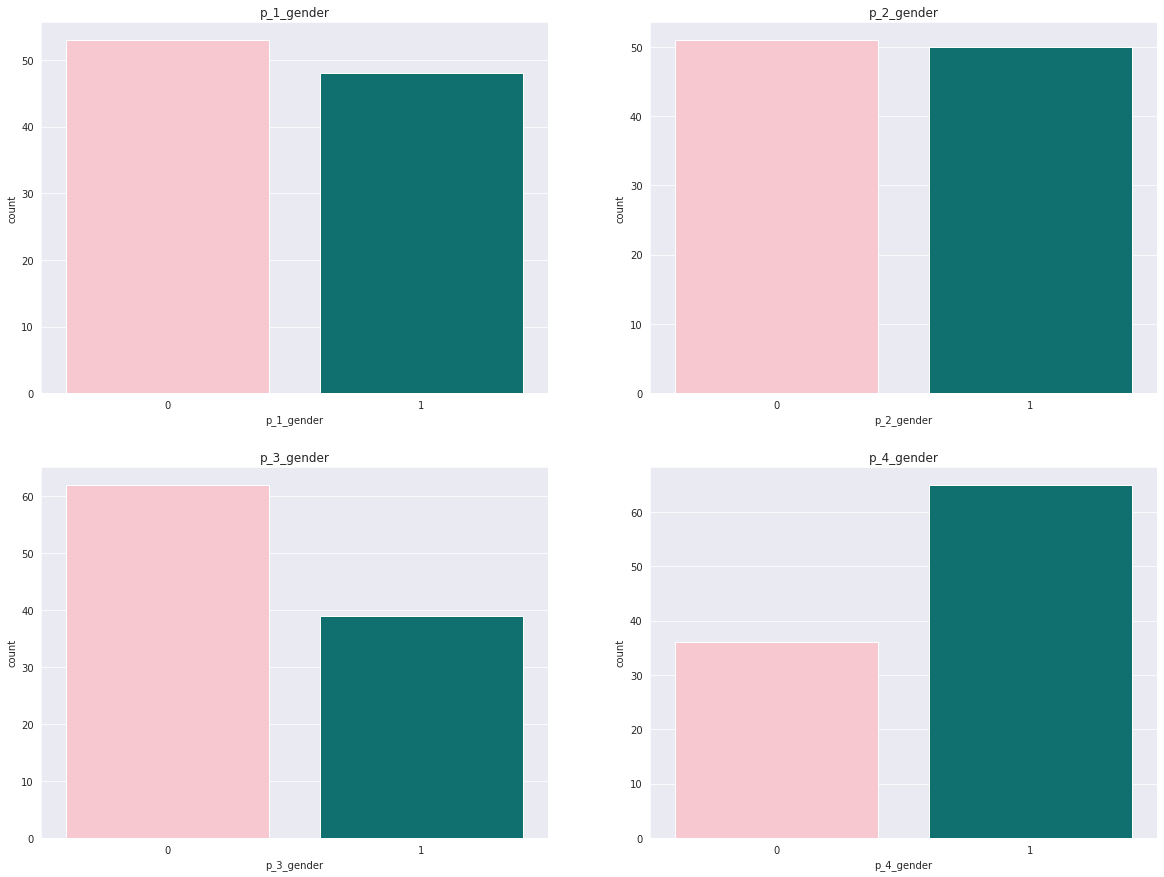

In [7]:
fig,axs = plt.subplots(2,2)
fig.set_figwidth(20)
fig.set_figheight(15)
sns.countplot(c_data[player_genders[0]],ax = axs[0,0],palette=['pink','teal'])
sns.countplot(c_data[player_genders[1]],ax = axs[0,1],palette=['pink','teal'])
sns.countplot(c_data[player_genders[2]],ax = axs[1,0],palette=['pink','teal'])
sns.countplot(c_data[player_genders[3]],ax = axs[1,1],palette=['pink','teal'])
axs[0,0].set_title(player_genders[0])
axs[0,1].set_title(player_genders[1])
axs[1,0].set_title(player_genders[2])
axs[1,1].set_title(player_genders[3])



### So we see that the first and second contestants are usually uniformly distributed but the third and fourth contestants are completely opposite the 3 contestant is usually a female and the 4 contestant is usually a male

In [8]:
gender_l = []
age_l    = []
fast_round = []
chosen_sum = []
round_status =[]
choice = []

for index,row in c_data.iterrows():
    for n in np.arange(1,4):
        gender_l.append(row['p_'+str(n)+'_gender'])
    for n in np.arange(1,4):
        age_l.append(row['p_'+str(n)+'_age'])
    for n in np.arange(1,4):
        chosen_sum.append(row['p_'+str(n)+'_play_sum_chosen'])
    for n in np.arange(1,4):
        fast_round.append(row['p_'+str(n)+'_fast_round_sum'])
    for n in np.arange(2,4):
        round_status.append(row['p_'+str(n)+'_round_status'])
    for n in np.arange(1,4):
        choice.append(row['p_'+str(n)+'_choice'])     

p_data = pd.DataFrame({'Gender':gender_l,"Age":age_l,'fast_round_sum':fast_round,'chosen_sum':chosen_sum,'choice_type':choice})

Text(0.5, 1.0, 'Distribution Of Gender In The 3 Season Of The Show')

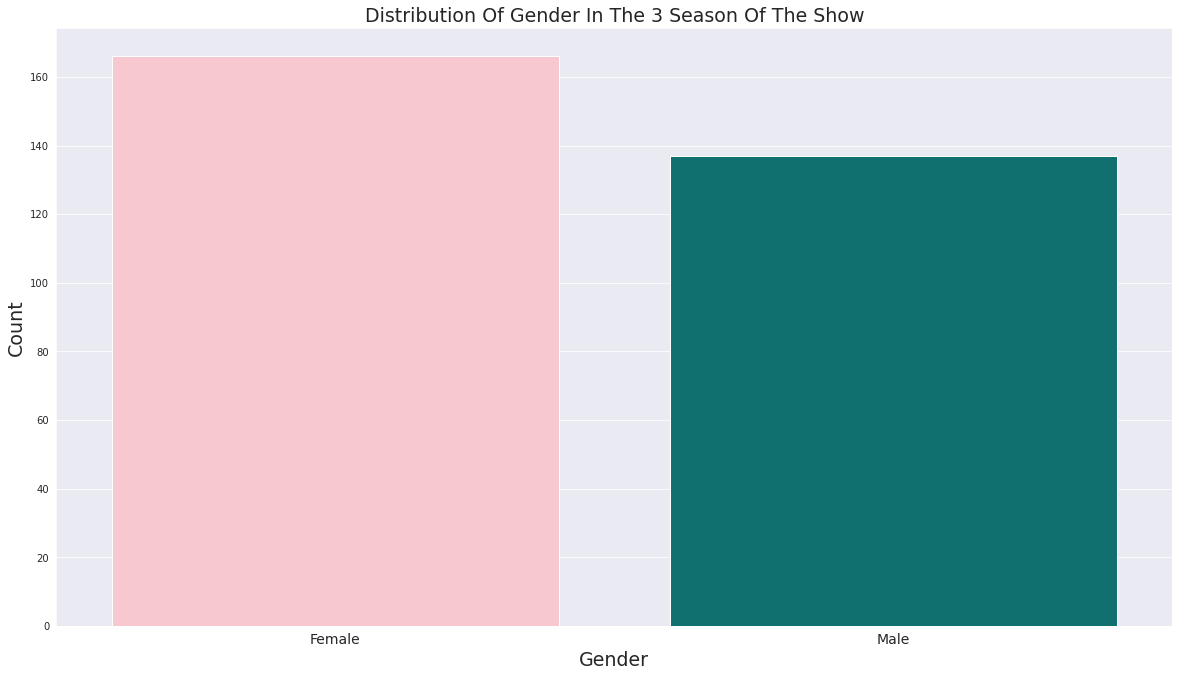

In [9]:
plt.figure(figsize=(20,11))
ax = sns.countplot(p_data['Gender'],palette=['pink','teal'])
ax.set_xticklabels(['Female','Male'],fontsize=14)
ax.set_ylabel('Count',fontsize=19)
ax.set_xlabel('Gender',fontsize=19)
ax.set_title('Distribution Of Gender In The 3 Season Of The Show',fontsize=19)

### We see that in the first 3 season of the game show there were more female contestants the male contestans

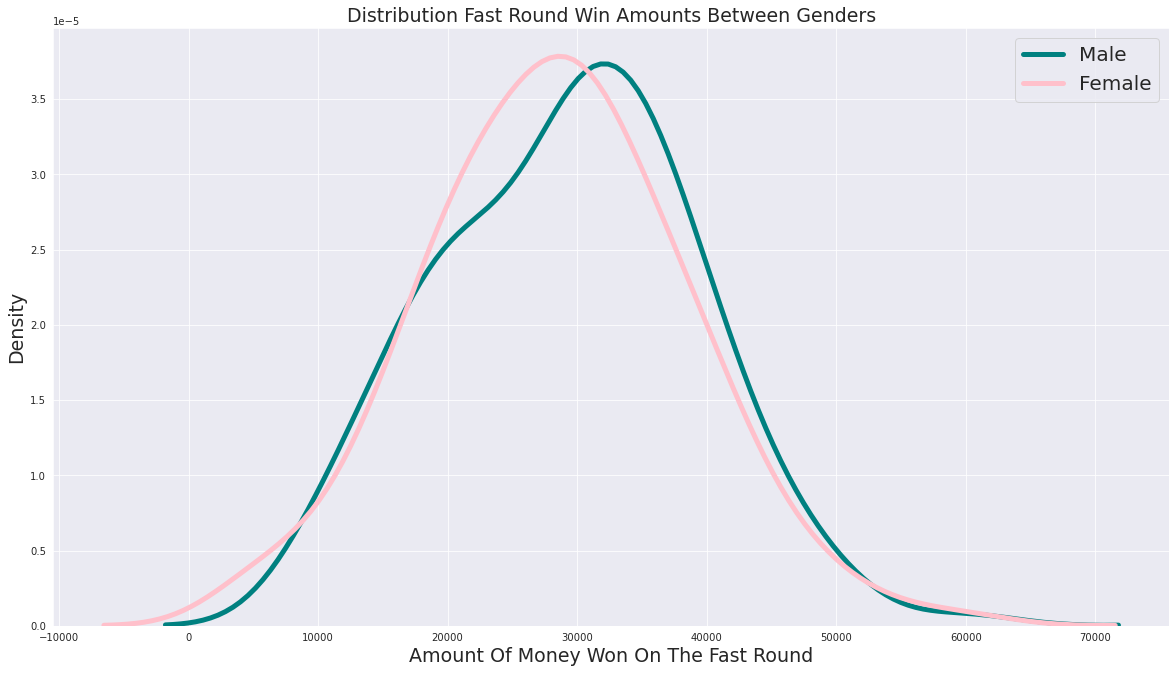

In [10]:
plt.figure(figsize=(20,11))
ax = sns.distplot(p_data[p_data['Gender']==1]['fast_round_sum'],bins=10,label='Male',color='teal',hist=False,kde_kws={'lw':5})
ax = sns.distplot(p_data[p_data['Gender']==0]['fast_round_sum'],bins=10,label='Female',color='pink',hist=False,kde_kws={'lw':5})
ax.set_ylabel('Density',fontsize=19)
ax.set_xlabel('Amount Of Money Won On The Fast Round',fontsize=19)
ax.set_title('Distribution Fast Round Win Amounts Between Genders',fontsize=19)
plt.legend(prop={'size':20})

### Apparently males usually win heigher amounts of money in the fast round , meaning they usually awnser more questions , we see that the distribution means are different but in a farily small amount meaning the difference between males and females are usually about 2-3 questions in average.

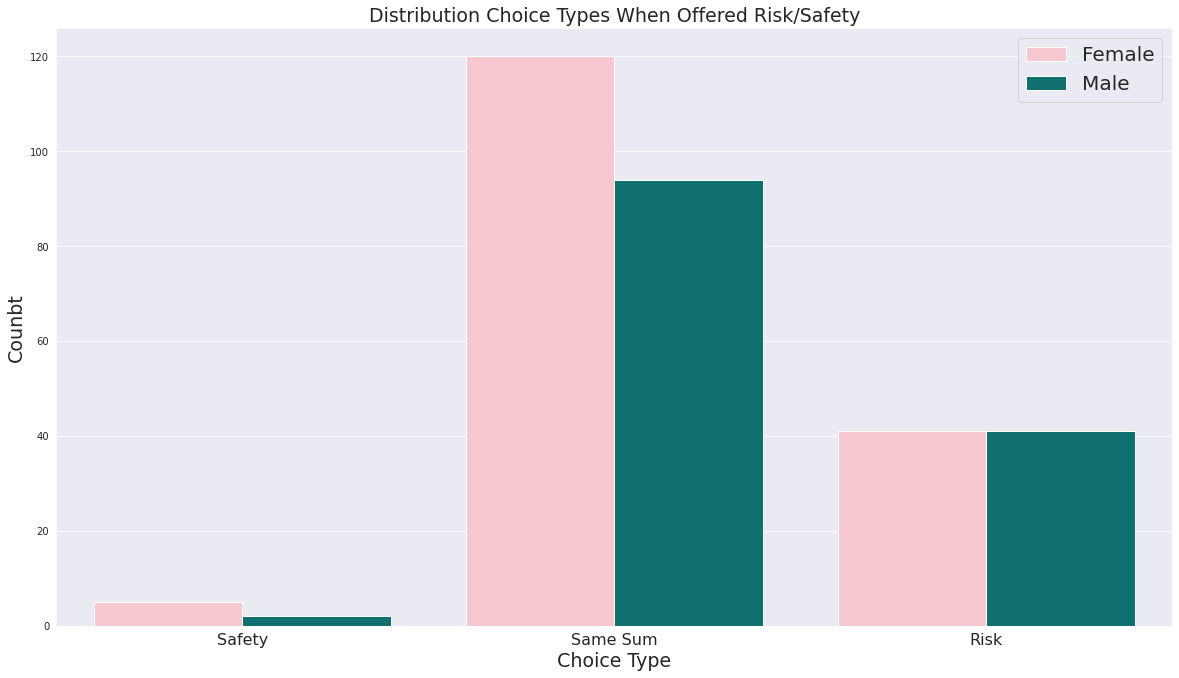

In [11]:
plt.figure(figsize=(20,11))
ax = sns.countplot(p_data['choice_type'],hue=p_data['Gender'],palette=['pink','teal'])
ax.set_ylabel('Counbt',fontsize=19)
ax.set_xlabel('Choice Type',fontsize=19)
ax.set_title('Distribution Choice Types When Offered Risk/Safety',fontsize=19)
ax.set_xticklabels(['Safety','Same Sum','Risk'],fontsize=16)
plt.legend(labels = ['Female','Male'],prop={'size':20})

### Males and females have the same probability for taking a risk , we do not see any gender difference in the decision to take a risk. We also see that more females choosen to stay in the same sum they had but we can derive that the amount between genders are more or less the same because we have more females contestants. The interesting insight we see here is that females tend slightly more to choose the 'safe' option over man that choose the 'safe' option less frequentley

## Cross Age Analysis

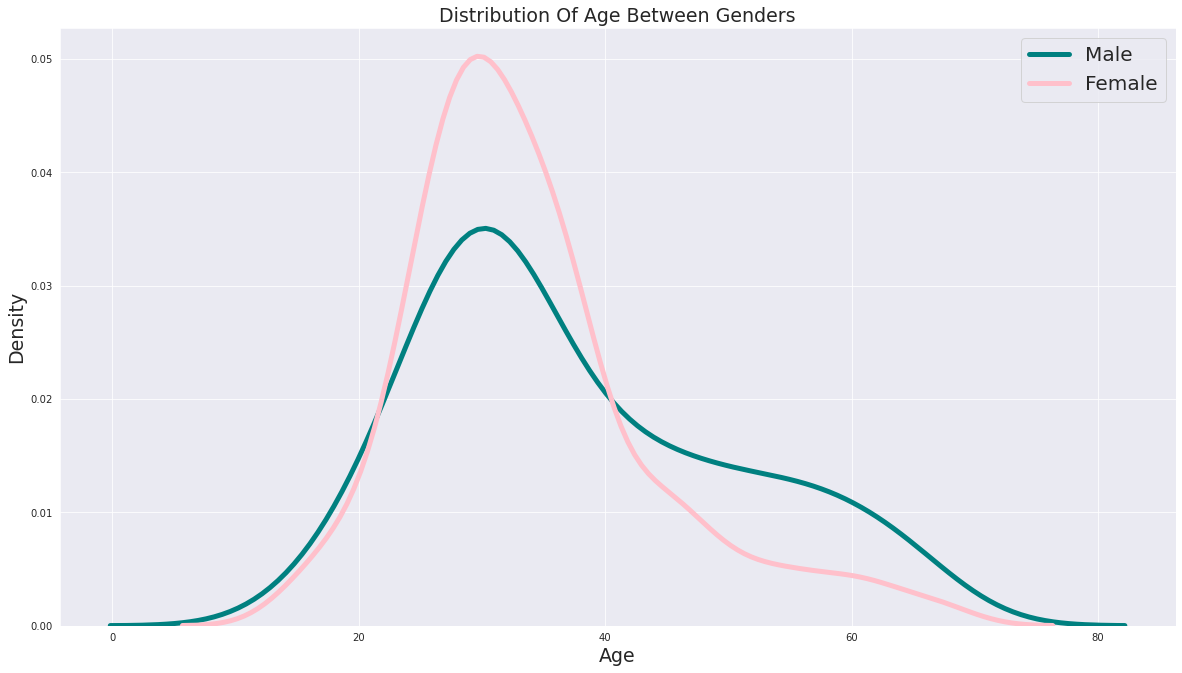

In [12]:
plt.figure(figsize=(20,11))
ax = sns.distplot(p_data[p_data['Gender']==1]['Age'],bins=10,label='Male',color='teal',hist=False,kde_kws={'lw':5})
ax = sns.distplot(p_data[p_data['Gender']==0]['Age'],bins=10,label='Female',color='pink',hist=False,kde_kws={'lw':5})
ax.set_ylabel('Density',fontsize=19)
ax.set_xlabel('Age',fontsize=19)
ax.set_title('Distribution Of Age Between Genders',fontsize=19)
plt.legend(prop={'size':20})

### A Female contestant is more likely to be between the age of 20 and 40 as seen on the plot ,the female curve is heigher and narrower compared to the male curve which is shorter and much wider meaning a male contestant age is much more scattered and altough we can see that simmilarly to female a male contestant is usually aged 20-40 but the curve shows us that there is a fair amount of male contestents aged 40-60 as well much more then female contestans in the same age range.

In [13]:
#creating age groups 
p_data['Age_Group'] = pd.cut(p_data['Age'],bins=10,labels=['14-19','20 - 25','26-30','31-35','36-41','42-46','47-51','52-56','57-61','62-67',])


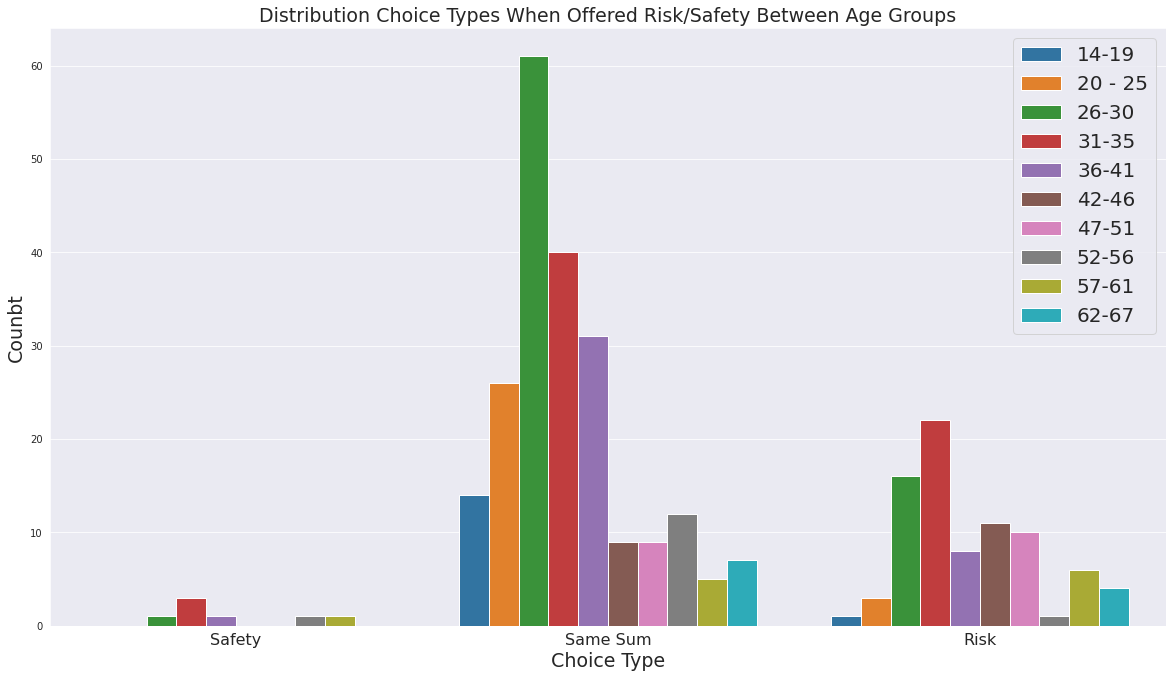

In [14]:
plt.figure(figsize=(20,11))
ax = sns.countplot(p_data['choice_type'],hue=p_data['Age_Group'])
ax.set_ylabel('Counbt',fontsize=19)
ax.set_xlabel('Choice Type',fontsize=19)
ax.set_title('Distribution Choice Types When Offered Risk/Safety Between Age Groups',fontsize=19)
ax.set_xticklabels(['Safety','Same Sum','Risk'],fontsize=16)
plt.legend(prop={'size':20})

### The contestants in the age range [26-35] are the ones 

In [15]:
p_data

,Gender,Age,fast_round_sum,chosen_sum,choice_type,Age_Group
0,1,30,20000,20000,2,26-30
1,0,27,50000,50000,2,26-30
2,1,56,35000,35000,2,52-56
3,1,45,35000,35000,2,42-46
4,0,67,30000,30000,2,62-67
...,...,...,...,...,...,...
298,0,29,45000,45000,2,26-30
299,1,41,45000,45000,2,36-41
300,0,37,30000,30000,2,36-41
301,1,55,30000,30000,2,52-56


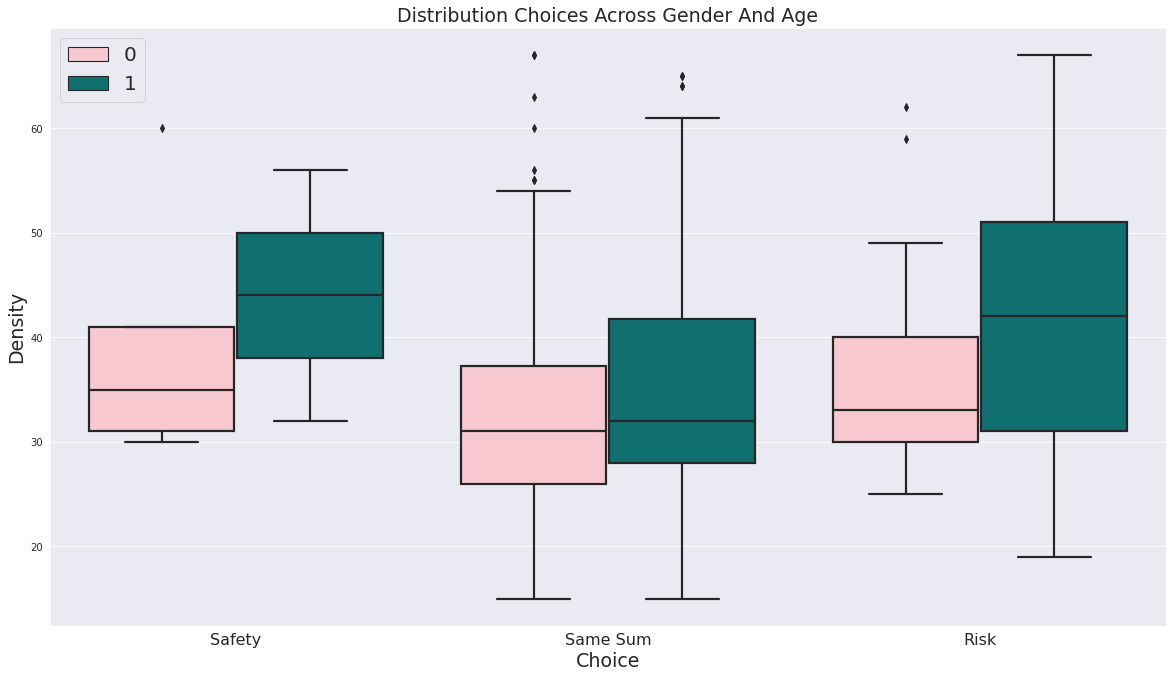

In [16]:
plt.figure(figsize=(20,11))
ax = sns.boxplot(x=p_data['choice_type'],y=p_data['Age'],hue=p_data['Gender'],palette=['pink','teal'],linewidth=2.2)

ax.set_ylabel('Density',fontsize=19)
ax.set_xlabel('Choice',fontsize=19)
ax.set_xticklabels(['Safety','Same Sum','Risk'],fontsize=16)
ax.set_title('Distribution Choices Across Gender And Age',fontsize=19)
plt.legend(prop={'size':20})

### Males in the age group [40-50] are more likley to to take the safe options compared to females which lay in the age range [32-41], both males and females that choose to stay with the same sum are distributed across the mid 30's up to the early 40's . We also see that males that take risk are usually aged between 30 and 50 compared to females that take risks which are distributed between ages 30 and 40.

## Team Analysis

Text(0, 0.5, 'Total Money Earned')

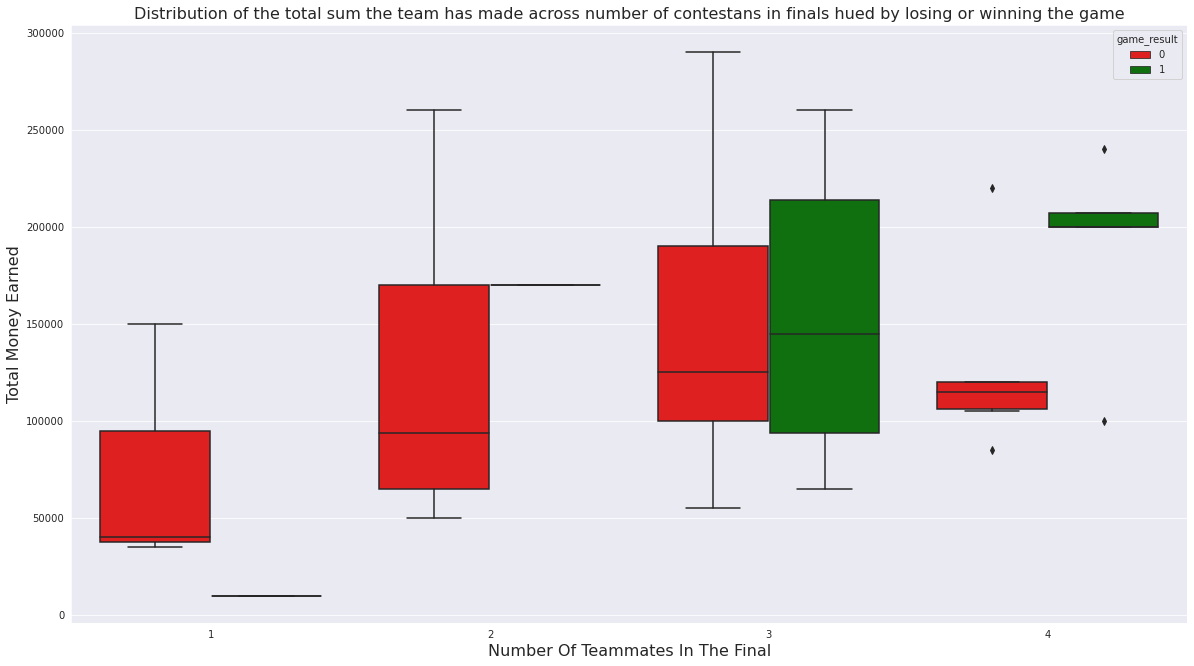

In [17]:
plt.figure(figsize=(20,11))
ax = sns.boxplot(x=c_data['contestants_at_finals'],y=c_data['team_total_sum'],hue=c_data['game_result'],palette=['red','green'])
ax.set_title('Distribution of the total sum the team has made across number of contestans in finals hued by losing or winning the game',fontsize=16)
ax.set_xlabel('Number Of Teammates In The Final',fontsize=16)
ax.set_ylabel('Total Money Earned',fontsize=16)

### We see that teams under 3 pepole have a probability to win that tends to zero.Most wins are with 3 team members which is suprising , one would excpect a bigger team (meaning 4 people) to win more time , in our case not many teams survive with 4 Teammates in the finals but even when there are 4 teammates there are still more losses the win compared to 3 teammates at the finals. 

Text(0, 0.5, 'Number Of Question Answered')

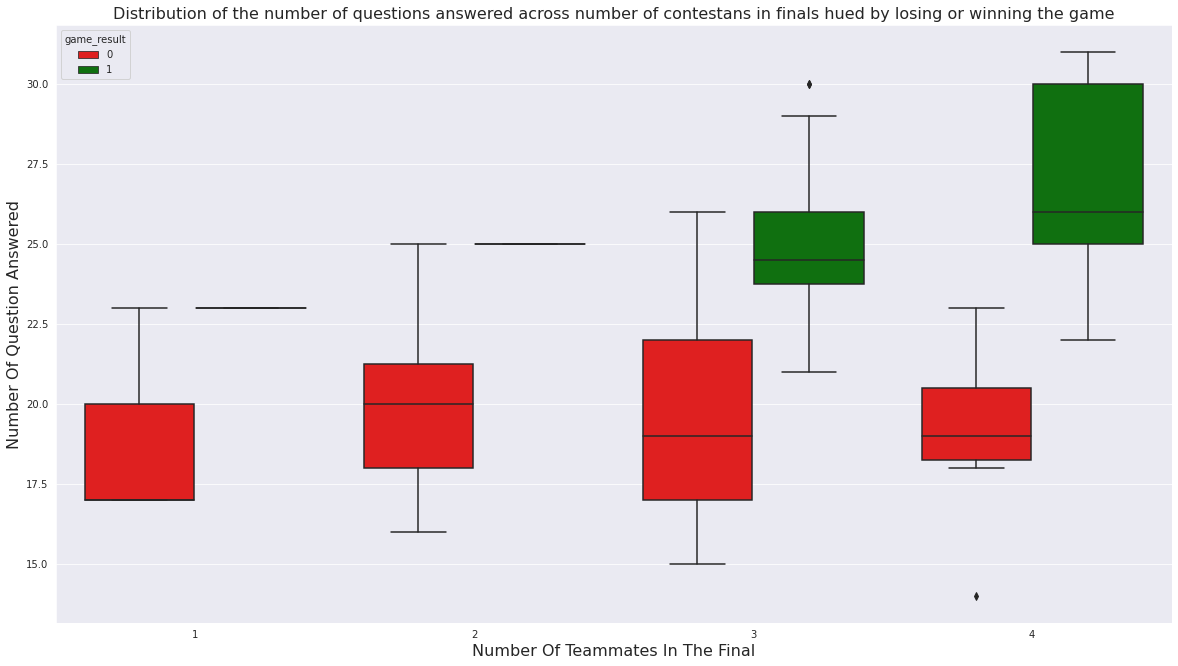

In [18]:
plt.figure(figsize=(20,11))
ax = sns.boxplot(x=c_data['contestants_at_finals'],y=c_data['question_answered'],hue=c_data['game_result'],palette=['red','green'])
ax.set_title('Distribution of the number of questions answered across number of contestans in finals hued by losing or winning the game',fontsize=16)
ax.set_xlabel('Number Of Teammates In The Final',fontsize=16)
ax.set_ylabel('Number Of Question Answered',fontsize=16)

### We see that a team that teams which answered abouve 22 question are highley likley to win the game and most of the time the teams who answer more then 22 quetion are teams of 3/4 people.

## Contestant Correlation Map

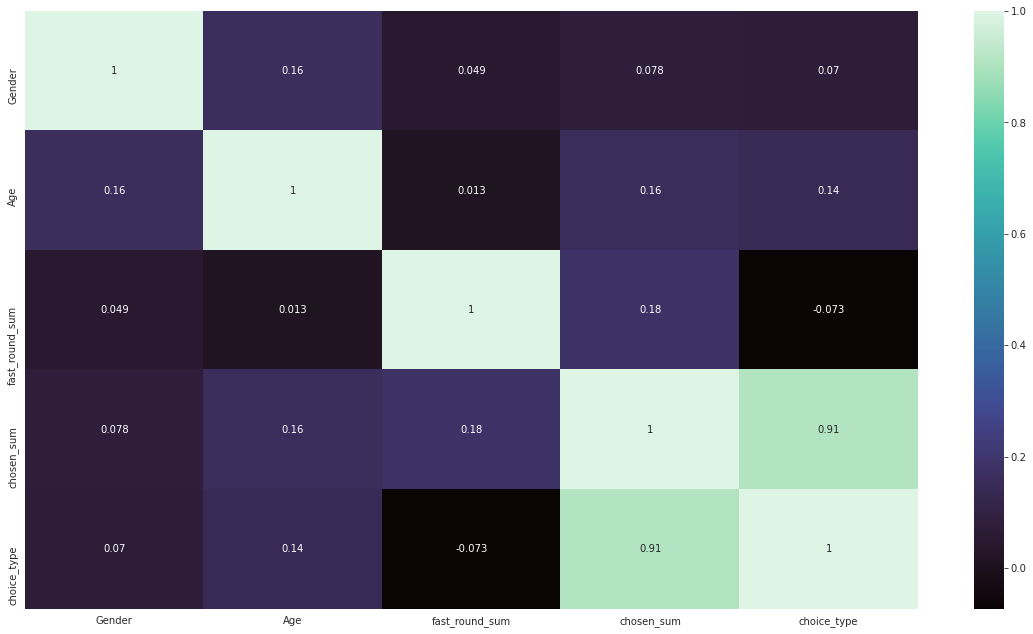

In [19]:
p_cors = p_data.corr('pearson')
plt.figure(figsize=(20,11))
ax = sns.heatmap(p_cors,annot=True,cmap='mako')

## Game Correlation Map

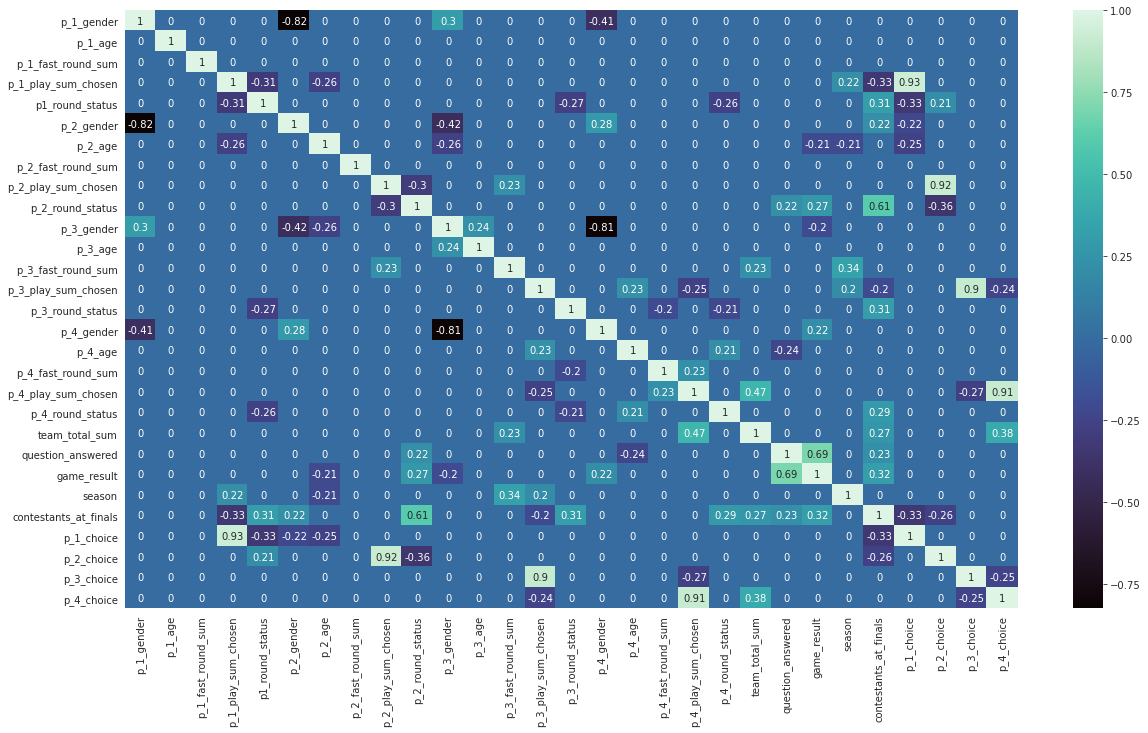

In [20]:
c_cors = c_data.corr('pearson')
for index,row in c_cors.iterrows():
    for en,value in enumerate(row):
        if value > 0.2 or value < -0.2:
            pass
        else:
            c_cors.at[index,c_cors.columns[en]] = 0

plt.figure(figsize=(20,11))
ax = sns.heatmap(c_cors,cmap='mako',annot=True)

In [21]:
#end of eda

# Model Selection ,Prediction and Evaluation

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import classification_report,mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

## Predicting The Game Result

### Using Question Answered At Finals

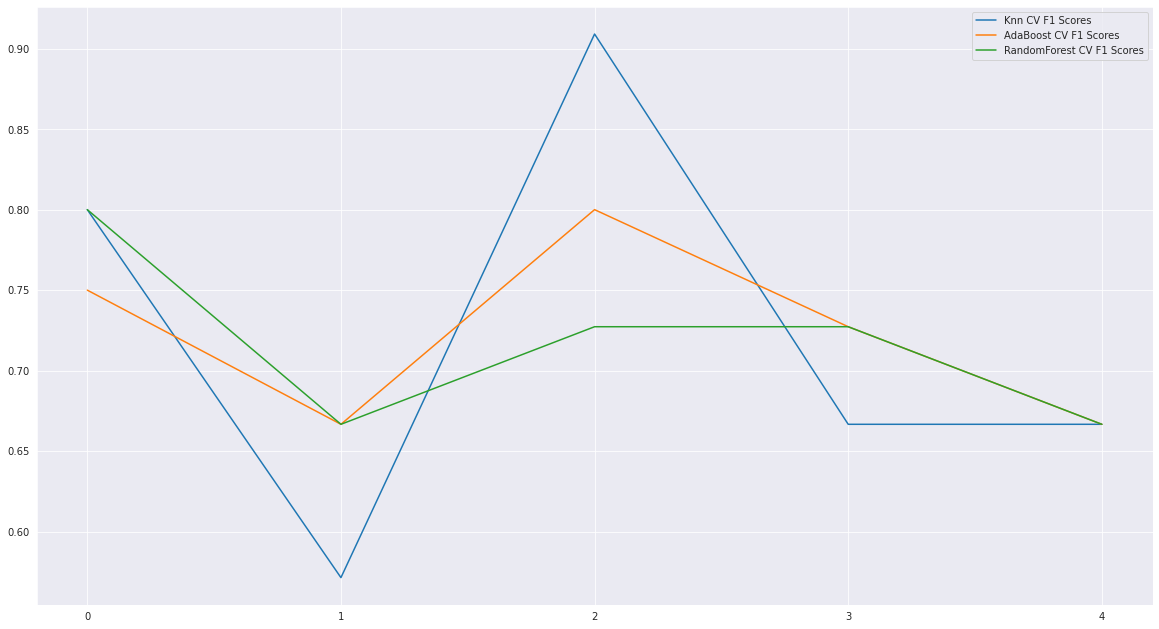

In [23]:
y = c_data['game_result']
X = c_data[['question_answered','contestants_at_finals']]

train_x,test_x,train_y,test_y = train_test_split(X,y)

KNN_pipe = Pipeline(steps=[('scale',StandardScaler()),('knn',KNeighborsClassifier(n_neighbors=15))])
KNN_scores = cross_val_score(KNN_pipe,X,y,cv=5,scoring='f1')
KNN_scores.mean()

ADA_pipe = Pipeline(steps=[('scale',StandardScaler()),('knn',AdaBoostClassifier(n_estimators=5,learning_rate=0.03,random_state=42))])
ADA_scores = cross_val_score(ADA_pipe,X,y,cv=5,scoring='f1')
ADA_scores.mean()

RF_pipe = Pipeline(steps=[('scale',StandardScaler()),('knn',RandomForestClassifier(n_estimators=35,random_state=42))])
RF_scores = cross_val_score(RF_pipe,X,y,cv=5,scoring='f1')
RF_scores.mean()


plt.figure(figsize=(20,11))
ax = sns.lineplot(x=np.arange(0,5),y=KNN_scores,label='Knn CV F1 Scores')
ax = sns.lineplot(x=np.arange(0,5),y=ADA_scores,label='AdaBoost CV F1 Scores')
ax = sns.lineplot(x=np.arange(0,5),y=RF_scores,label='RandomForest CV F1 Scores')
ax.set_xticks(np.arange(0,5,1))

### Using Gender And Age Of Contestants

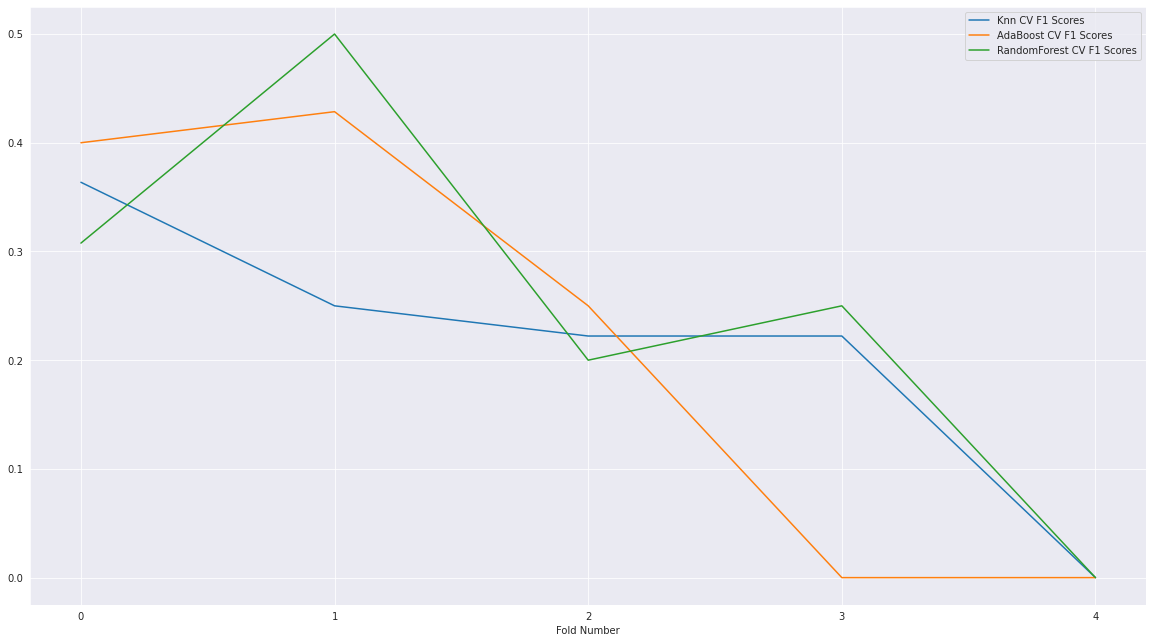

In [24]:
y = c_data['game_result']
X = c_data[['p_2_age','p_3_gender','p_4_gender']]

train_x,test_x,train_y,test_y = train_test_split(X,y)

KNN_pipe = Pipeline(steps=[('scale',StandardScaler()),('knn',KNeighborsClassifier(n_neighbors=5))])
KNN_scores = cross_val_score(KNN_pipe,X,y,cv=5,scoring='f1')
KNN_scores.mean()

ADA_pipe = Pipeline(steps=[('scale',StandardScaler()),('knn',AdaBoostClassifier(n_estimators=35,learning_rate=0.3,random_state=42))])
ADA_scores = cross_val_score(ADA_pipe,X,y,cv=5,scoring='f1')
ADA_scores.mean()

RF_pipe = Pipeline(steps=[('scale',StandardScaler()),('knn',RandomForestClassifier(n_estimators=35,random_state=42))])
RF_scores = cross_val_score(RF_pipe,X,y,cv=5,scoring='f1')
RF_scores.mean()


plt.figure(figsize=(20,11))
ax = sns.lineplot(x=np.arange(0,5,1),y=KNN_scores,label='Knn CV F1 Scores')
ax = sns.lineplot(x=np.arange(0,5,1),y=ADA_scores,label='AdaBoost CV F1 Scores')
ax = sns.lineplot(x=np.arange(0,5,1),y=RF_scores,label='RandomForest CV F1 Scores')
ax.set_xlabel('Fold Number')
ax.set_xticks(np.arange(0,5,1))